In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.formula.api import ols

from scipy.stats import f

import numpy as np

%matplotlib inline

In [69]:
from scipy.stats import chi2

# MOOC Econometrics
## Training Exercise 4.2

In this exercise we reconsider the example from lecture 4.1 where an analyst models sales of ice cream over time as
a function of price and where price is possibly endogenous due to strategic behavior of the salesperson. In this case
the salesperson knows that when a particular event is organized, demand tends to be high. Therefore she may set
a high price when there is such an event.

We consider the following data generating process

$$\text{Sales} = 100 − 1 \times \text{Price} + \alpha \times \text{Event} + \varepsilon_1$$
$$\text{Price} = 5 + \beta \times \text{Event} + \varepsilon_2$$


where $\text{Event}$ is a 0/1 dummy variable indicating whether an event took place at a point in time. 

However, when trying to estimate the $\text{Price}$ coefficient the analyst does not have the $\text{Event}$ dummy variable and simply regresses $\text{Sales}$ on a constant and $\text{Price}$.

The dataset `TrainExer42` contains sales and price data for different values of $\alpha$ and $\beta$. For each scenario the same simulated values for $\varepsilon_1$ and $\varepsilon_1$ were used. Specifically, the data contains 4 price series and 16 sales series.

Price variables `PriceB` give the price assuming that $\beta=B$, for $B= 0, 1, 5, 10$. Sales variables `SalesA_B` give the sales for $\alpha =A$ and $\beta =B$, where $A$ also takes the values $0, 1, 5, 10$.

In [3]:
sales = pd.read_csv('TrainExer42.txt', sep=',', decimal='.')
sales.tail()

,PRICE0,PRICE1,PRICE5,PRICE10,SALES0_0,SALES0_1,SALES0_5,SALES0_10,SALES1_0,SALES1_1,SALES1_5,SALES1_10,SALES5_0,SALES5_1,SALES5_5,SALES5_10,SALES10_0,SALES10_1,SALES10_5,SALES10_10
245,3.806461,3.806461,3.806461,3.806461,96.157742,96.157742,96.157742,96.157742,96.157742,96.157742,96.157742,96.157742,96.157742,96.157742,96.157742,96.157742,96.157742,96.157742,96.157742,96.157742
246,6.539723,6.539723,6.539723,6.539723,93.102487,93.102487,93.102487,93.102487,93.102487,93.102487,93.102487,93.102487,93.102487,93.102487,93.102487,93.102487,93.102487,93.102487,93.102487,93.102487
247,4.674779,4.674779,4.674779,4.674779,94.225919,94.225919,94.225919,94.225919,94.225919,94.225919,94.225919,94.225919,94.225919,94.225919,94.225919,94.225919,94.225919,94.225919,94.225919,94.225919
248,4.950465,4.950465,4.950465,4.950465,95.290470,95.290470,95.290470,95.290470,95.290470,95.290470,95.290470,95.290470,95.290470,95.290470,95.290470,95.290470,95.290470,95.290470,95.290470,95.290470
249,5.298356,5.298356,5.298356,5.298356,94.997375,94.997375,94.997375,94.997375,94.997375,94.997375,94.997375,94.997375,94.997375,94.997375,94.997375,94.997375,94.997375,94.997375,94.997375,94.997375


**(a)** First consider the case where the event only directly affects price ($\alpha = 0$). 

- Estimate and report the price coefficients under all 4 scenarios for $\beta$ and 
- calculate the $R^2$ for all these regressions. 
- Do the estimated price coefficients signal any endogeneity problem for these values of $α$ and $β$? 
- Can you also explain the pattern you find for the $R^2$?

b = 0
[('alpha', 99.862021780752841), ('beta', -0.97580031800164468)]
R2 = 0.794442966304


b = 1
[('alpha', 99.808455783836806), ('beta', -0.96589547848490698)]
R2 = 0.80807973909


b = 5
[('alpha', 99.833248737244176), ('beta', -0.97325276700021213)]
R2 = 0.93038198893


b = 10
[('alpha', 99.88975576953851), ('beta', -0.98496492415668735)]
R2 = 0.976907308372




(-1, 0)

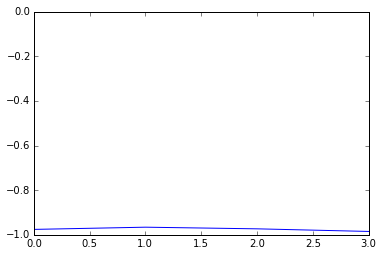

In [25]:
betas = []
for b in [0, 1, 5, 10]:
    print 'b = %d' % b
    y = sales.ix[:, 'SALES0_%d' % b]
    X = sales.ix[:, 'PRICE%d' % b]
    model = sm.OLS(y, sm.add_constant(X)).fit()
    betas.append(model.params['PRICE%d' % b])
    print zip(['alpha', 'beta'], model.params.tolist())
    print 'R2 =', model.rsquared
    print
    print 

plt.plot(betas)
plt.ylim([-1, 0])

- All $\beta$'s here are close enough to the true value of $-1$, so `Price` is not endorgenous here, `Event` does not influence `Sales` directly in this case
- $R^2$ increases for higher values of $\beta$: higher $\beta$ more variation can be explained

**(b)** Repeat the exercise above, but now consider the case where the event only directly affects sales, that is, set
$β = 0$ and check the results for the four different values of $α$.

a = 0, b = 0
[('alpha', 99.862021780752841), ('beta', -0.97580031800164468)]
R2 = 0.794442966304


a = 1, b = 0
[('alpha', 99.948486118249974), ('beta', -0.96908630622201153)]
R2 = 0.718181261584


a = 5, b = 0
[('alpha', 100.29434346823854), ('beta', -0.94223025910348357)]
R2 = 0.243242197843


a = 10, b = 0
[('alpha', 100.72666515572423), ('beta', -0.9086602002053229)]
R2 = 0.0759876542244




(-1, 0)

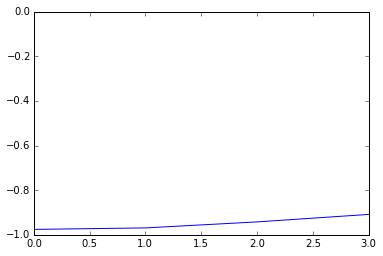

In [26]:
betas = []

b = 0
for a in [0, 1, 5, 10]:
    print 'a = %d, b = %d' % (a, b)
    y = sales.ix[:, 'SALES%d_%d' % (a, b)]
    X = sales.ix[:, 'PRICE%d' % b]
    model = sm.OLS(y, sm.add_constant(X)).fit()
    betas.append(model.params['PRICE%d' % b])
    print zip(['alpha', 'beta'], model.params.tolist())
    print 'R2 =', model.rsquared
    print
    print 

plt.plot(betas)
plt.ylim([-1, 0])

- All coefficients of $\beta$ are relatively close to the real value $\beta = -1$
- `Price` is not endongenous, because `Event` only affect `Sales`, not `Price`
- so the omission of the `Event` does not lead to correlation between error and `Price`
- $R^2$ drops significantly for higher values of $\alpha$: high $\alpha$ leads to a lot of variation due the `Event`, and this variation is not captured by the regression because we regress only on constant and price (this is also the reason why $\beta = -0.91$ for $\alpha=10$ - it's because there's large estimation uncertainly)

**(c)** Finally consider the parameter estimates for the cases where the event affects price and sales, that is, look at
$α = β = 0, 1, 5, 10$. Can you see the impact of endogeneity in this case?

a = 0, b = 0
[('alpha', 99.862021780752841), ('beta', -0.97580031800164468)]
R2 = 0.794442966304


a = 1, b = 1
[('alpha', 99.457868682634384), ('beta', -0.87389187639797994)]
R2 = 0.706444756186


a = 5, b = 5
[('alpha', 96.51478500839481), ('beta', -0.2728863814017603)]
R2 = 0.214315669554


a = 10, b = 10
[('alpha', 95.514825265273004), ('beta', -0.085038973565486134)]
R2 = 0.0643393703279




(-1, 0)

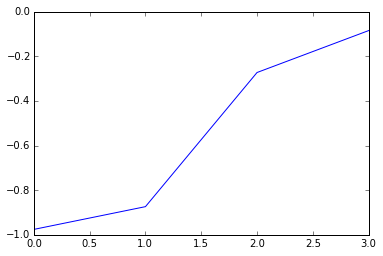

In [27]:
betas = []

for a in [0, 1, 5, 10]:
    b = a
    print 'a = %d, b = %d' % (a, b)
    y = sales.ix[:, 'SALES%d_%d' % (a, b)]
    X = sales.ix[:, 'PRICE%d' % b]
    model = sm.OLS(y, sm.add_constant(X)).fit()
    betas.append(model.params['PRICE%d' % b])
    print zip(['alpha', 'beta'], model.params.tolist())
    print 'R2 =', model.rsquared
    print
    print 

plt.plot(betas)
plt.ylim([-1, 0])

If both $\alpha \ne 0$ and $\beta \ne 0$, the omission of `Event` will lead to correlation b/w error term and `Price`, so we see endogenity

consequence: the estimate is completely off

## Training Exercise 4.4

In this exercise we study the gasoline market and look at the relation between consumption and price in the USA.

We will use yearly data on these variables from 1977 to 1999. Additionally we have data on disposable income, and
some price indices. 

More precisely we have

- `GC`: log real gasoline consumption;
- `PG`: log real gasoline price index;
- `RI`: log real disposable income;
- `RPT`: log real price index of public transport;
- `RPN`: log real price index of new cars;
- `RPU`: log real price index of used cars.

We consider the following model

$$\text{GC} = β_1 + β_2 \, \text{PG} + β_3 \, \text{RI} + ε$$

**(a)** Give an argument why the gasoline price may be endogenous in this equation.

- Maybe strategic hueta
- High demain may lead to increase in the market price. I.e. consumption (`GC`) and price (`PG`) are determined simulatenously. 


**(b)** Use 2SLS to estimate the price elasticity ($β_2$). Use a constant, `RI`, `RPT`, `RPN`, and `RPU` as instruments.

In [30]:
gasoline = pd.read_csv('TrainExer44.txt')
gasoline.head()

,OBS,GC,PG,RI,RPN,RPT,RPU
0,1970,6.714227,-0.100947,2.943489,0.311872,-0.097374,-0.218002
1,1971,6.765328,-0.137221,2.985432,0.309661,-0.068993,-0.204794
2,1972,6.830206,-0.156660,3.033986,0.268967,-0.061672,-0.233363
3,1973,6.847757,-0.123892,3.093292,0.210451,-0.111888,-0.232193
4,1974,6.697846,0.074440,3.079637,0.160793,-0.194156,-0.295147


First stage:

- dependent variables is `PG` (it's a predictor in the original model)
- so model is `PG ~ RPT + RPN + RPU + RI`

In [55]:
Z = sm.add_constant(gasoline.ix[:, ['RPT', 'RPN', 'RPU', 'RI']])
y = gasoline.ix[:, 'PG']

stage1_model = sm.OLS(y, Z).fit()
pd.DataFrame({'$p$-value': stage1_model.pvalues.round(4), 
              '$\\beta$': stage1_model.params.round(4) })

,$\beta$,$p$-value
const,7.7410,0.0000
RPT,-0.8080,0.0003
RPN,-3.5279,0.0000
RPU,0.2331,0.2148
RI,-2.2984,0.0000


Second stage:

- dependent variable is `GC`
- we use the fitted value of `PG` from stage 1 
- so model is `GC ~ RI + PG_fit`

In [33]:
gasoline['PG_fit'] = stage1_model.fittedvalues
X = sm.add_constant(gasoline.ix[:, ['RI', 'PG_fit']])
y = gasoline.ix[:, 'GC']

stage2_model = sm.OLS(y, X).fit()
pd.DataFrame({'$p$-value': stage2_model.pvalues.round(4), 
              '$\\beta$': stage2_model.params.round(4) })

,$\beta$,$p$-value
const,5.0137,0
RI,0.5647,0
PG_fit,-0.5444,0


So the estimate of price elastisity is $\beta_2 = -0.54$. So 1% of price increase leads to 0.5% decrease in gasoline consumption

**(c)** Perform a Sargan test to test whether the five instruments are correlated with $ε$. What do you conclude?

We need to check if the resuduals from 2SLS are correlated with the instruments. If yes, it's a sign that the instruments may directly influence the dependent variable, and they are therefore not valid

First, we find the residulas of 2SLS: 

- $e = \text{GC} - (5.01 + 0.56 \, \text{RI} - 0.54 \, \text{PG})$
- note that this is the original `PG`, not the fitted value `PG_fit` that we used at the 2nd stage

In [54]:
X = sm.add_constant(gasoline.ix[:, ['RI', 'PG']])
predicted = np.array(X).dot(stage2_model.params)

e = gasoline['GC'] - predicted

In [65]:
Z = sm.add_constant(gasoline.ix[:, ['RPT', 'RPN', 'RPU', 'RI']])
sargan_res = sm.OLS(e, Z).fit()
print 'F = %0.4f (p-value = %0.4f)' % (sargan_res.fvalue, sargan_res.f_pvalue)

pd.DataFrame({'$p$-value': sargan_res.pvalues.round(4), 
              '$\\beta$': sargan_res.params.round(4) })

F = 0.7267 (p-value = 0.5821)


,$\beta$,$p$-value
const,-0.2098,0.4463
RPT,-0.0512,0.4180
RPN,0.0204,0.8599
RPU,-0.0702,0.2492
RI,0.0604,0.4590


In [70]:
n = len(e)
R2 = sargan_res.rsquared
print '    R2 = %0.4f' % R2
print 'n * R2 = %0.4f' % (n * R2)

    R2 = 0.1042
n * R2 = 3.1248


- Sargan test statistics equals to $n \cdot R^2 = 3.1248$ where $n$ is the sample size
- This statistic should be compared to $\chi^2(k_1)$ where $k_1 = 5 - 3 = 2$

Let's find the 5% critical value of $\chi^2(2)$

In [73]:
chi2.ppf(0.95, df=2)

5.9914645471079799

So it's more than 3.12, and we cannot reject $H_0$. Thus instruments seem to be valid

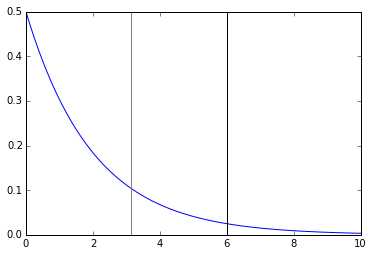

In [88]:
x = np.linspace(0, 10, 101)
plt.plot(x, chi2.pdf(x, 2))

plt.axvline(x=(n * R2), color='grey')
plt.axvline(x=chi2.ppf(0.95, df=2), color='black')

$p$-value:

In [82]:
1 - chi2.cdf(n * R2, 2)

0.20963415246141082

## Training Exercise 4.5

In this exercise we reconsider the example of lecture 4.5.

In this lecture we related the Grade Point Average (GPA) of learners in an engineering MOOC to the participation in a preparatory course. The dataset contains the following variables

- `GPA`: Grade Point Average in Engineering MOOC
- `Gender`: 0/1 dummy for gender (1: male, 0: female)
- `Participation`: 0/1 dummy for participation in a preparatory mathematics course (1: did participate, 0: did
not participate)
- `Email`: 0/1 dummy for receiving an email invitation to take the preparatory course (1: received invitation, 0:
did not receive invitation)

In [89]:
mooc = pd.read_csv('TrainExer45.txt')
mooc.head()

,GPA,PARTICIPATION,GENDER,EMAIL
0,7.386898,1,0,1
1,6.493597,1,1,1
2,4.956625,0,1,1
3,7.442979,1,1,0
4,6.281521,0,1,1


GPA vs PARTICIPATION

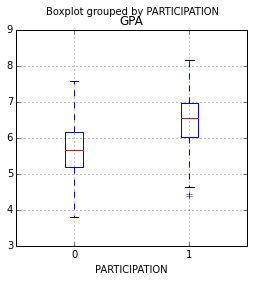

In [97]:
mooc.boxplot('GPA', by='PARTICIPATION', figsize=(4,4))

**(a)** Redo the OLS estimation of the coefficients in a model that explains GPA using a constant, gender and
preparatory course participation. Also calculate standard errors and $t$-values. Confirm that you obtain the same
results as mentioned in the lecture.


In [101]:
X = sm.add_constant(mooc.ix[:, ['GENDER', 'PARTICIPATION']])
gpa = mooc.ix[:, 'GPA']

ols5a = sm.OLS(gpa, X).fit()
ols5a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     161.0
Date:                Sat, 21 Nov 2015   Prob (F-statistic):           2.61e-61
Time:                        17:04:42   Log-Likelihood:                -1058.6
No. Observations:                1000   AIC:                             2123.
Df Residuals:                     997   BIC:                             2138.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const             5.7711      0.034    169.874      0.000         5.704     5.838
GENDER           -0.2138      0.044     -4.824      0.000        -0.301    -0.127
PARTICIPATION     0.8244      0.047     17.593      0.000         0.732     0.916
==============================================================================
Omnibus:                        4.241   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.120   Jarque-Bera (JB):                3.421
Skew:                          -0.019   Prob(JB):                        0.181
Kurtosis:                       2.716   Cond. No.                         2.82
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**(b)** Use the email dummy as an instrument to perform 2SLS estimation. 

First do the first-stage regression

$$\text{Participation} = γ_1 + γ_2 \, \text{Gender} + γ_3\, \text{Email} + η$$

In [102]:
part = mooc.ix[:, 'PARTICIPATION']
Z = sm.add_constant(mooc.ix[:, ['GENDER', 'EMAIL']])

twosls_stage1 = sm.OLS(part, Z).fit()
twosls_stage1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          PARTICIPATION   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     121.2
Date:                Sat, 21 Nov 2015   Prob (F-statistic):           7.58e-48
Time:                        17:06:34   Log-Likelihood:                -560.79
No. Observations:                1000   AIC:                             1128.
Df Residuals:                     997   BIC:                             1142.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.1011      0.023      4.415      0.000         0.056     0.146
GENDER         0.0485      0.027      1.801      0.072        -0.004     0.101
EMAIL          0.4129      0.027     15.349      0.000         0.360     0.466
==============================================================================
Omnibus:                      158.669   Durbin-Watson:                   2.126
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.615
Skew:                           0.381   Prob(JB):                     1.87e-13
Kurtosis:                       2.091   Cond. No.                         3.12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Next calculate the predicted values according to this regression and perform OLS on the model

$$\text{GPA} = β_1 + β_2 \, \text{Gender} + β_3 \, \text{Participation}_\text{fit} + ε$$

In [104]:
mooc['PARTICIPATION_fit'] = twosls_stage1.fittedvalues
X_hat = sm.add_constant(mooc.ix[:, ['GENDER', 'PARTICIPATION_fit']])
gpa = mooc.ix[:, 'GPA']

ols5b = sm.OLS(gpa, X_hat).fit()
ols5b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     6.694
Date:                Sat, 21 Nov 2015   Prob (F-statistic):            0.00129
Time:                        17:10:05   Log-Likelihood:                -1191.9
No. Observations:                1000   AIC:                             2390.
Df Residuals:                     997   BIC:                             2404.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
const                 5.9479      0.051    116.239      0.000         5.847     6.048
GENDER               -0.1728      0.051     -3.373      0.001        -0.273    -0.072
PARTICIPATION_fit     0.2405      0.122      1.964      0.050         0.000     0.481
==============================================================================
Omnibus:                       20.608   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.442
Skew:                           0.028   Prob(JB):                      0.00328
Kurtosis:                       2.479   Cond. No.                         6.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**(c)** Obtain the standard errors that correspond to the final regression in the previous part. These do not match
with the standard errors reported in the lecture! Why are the standard errors from part **(b)** wrong?

In [161]:
XTX_fit_inv = np.linalg.inv(X_hat.T.dot(X_hat))
n = len(gpa)
k = 3 # num of params
s2_c = np.sum(ols5b.resid ** 2) / (n - k)

se_c = np.sqrt(np.diag(s2_c * XTX_fit_inv))
se_c

array([ 0.05116938,  0.05121485,  0.12245936])

In [116]:
np.array(ols5b.bse)

array([ 0.05116938,  0.05121485,  0.12245936])

The standard error from the lecture is $[0.048, 0.048, 0.115]$

The reason why it's wrong is because we use a wrong estimate for the variance of $\varepsilon$: we use $\hat X$ (i.e. `PARTICIPATION_fit`) rather than $X$ (`PARTICIPATION`) directly

**(d)** Calculate the ratio between the standard errors in part **(b)** and those reported in the lecture. 

- Why is the obtained ratio the same for all parameters? 
- Explain how we can also obtain this ratio using different residual series.

In [157]:
X = sm.add_constant(mooc.ix[:, ['GENDER', 'PARTICIPATION']])

In [158]:
ZTZ_inv = np.linalg.inv(Z.T.dot(Z))
H_Z = Z.dot(ZTZ_inv).dot(np.array(Z.T))

XHX = X.T.dot(H_Z).dot(X)
XHX_inv = np.linalg.inv(XHX)

In [162]:
X_pred = np.array(X).dot(ols5b.params)

gpa = mooc.ix[:, 'GPA']
e = gpa - X_pred

n = len(e)
k = 3

s2_2sls = e.dot(e) / (n - k)
se_c_2sls = np.sqrt(np.diag(s2_2sls * XHX_inv))
se_c_2sls

array([ 0.04814693,  0.04818972,  0.11522598])

In [164]:
se_c / se_c_2sls

array([ 1.06277554,  1.06277554,  1.06277554])

So parameters obtained on the 2nd stage regression are all about 6% too high. 

This ratio comes from $\sqrt{\cfrac{\hat \sigma^2_\text{fit}}{\hat \sigma^2_\text{true}}}$

In [168]:
np.sqrt(s2_c / s2_2sls) 

1.062775541708564

So we can just correct these values without calculating $H_Z$

In [175]:
X = sm.add_constant(mooc.ix[:, ['GENDER', 'PARTICIPATION']])
X_pred = np.array(X).dot(ols5b.params)
e = gpa - X_pred

s2_2sls = e.dot(e)
s2_fit = np.sum(ols5b.resid ** 2)

se_ratio = np.sqrt(s2_fit / s2_2sls)

np.array(ols5b.bse / se_ratio)

array([ 0.04814693,  0.04818972,  0.11522598])